In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data_wo_fer = pd.read_excel("/content/drive/MyDrive/PCOS_data_without_infertility.xlsx",sheet_name = "Full_new")

In [ ]:
data_wo_fer.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
data_wo_fer.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
data_wo_fer.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
data_fer = pd.read_csv("/content/drive/MyDrive/PCOS_infertility.csv")

# Data Visualisation and Pre-processing

In [ ]:
data_fer.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
  data_fer.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


In [ ]:
data_fer.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [ ]:

data = pd.merge(data_wo_fer,data_fer, on='Patient File No.', suffixes={'','_y'},how='left')


data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
data.mean(axis = 0, skipna = True) 

Sl. No                    271.000000
Patient File No.          271.000000
PCOS (Y/N)                  0.327172
 Age (yrs)                 31.430684
Weight (Kg)                59.637153
Height(Cm)                156.484835
BMI                        24.311285
Blood Group                13.802218
Pulse rate(bpm)            73.247689
RR (breaths/min)           19.243993
Hb(g/dl)                   11.160037
Cycle(R/I)                  2.560074
Cycle length(days)          4.940850
Marraige Status (Yrs)       7.680926
Pregnant(Y/N)               0.380776
No. of aborptions           0.288355
  I   beta-HCG(mIU/mL)    664.549235
FSH(mIU/mL)                14.601832
LH(mIU/mL)                  6.469919
FSH/LH                      6.904831
Hip(inch)                  37.992606
Waist(inch)                33.841035
Waist:Hip Ratio             0.891895
TSH (mIU/L)                 2.981281
PRL(ng/mL)                 24.321497
Vit D3 (ng/mL)             49.915874
PRG(ng/mL)                  0.610945
R

In [ ]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
data=data.drop(["Pulse rate(bpm) "],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   RR (breaths/min)        541 non-null    int64  
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    int64  
 11  Cycle length(days)      541 non-null    int64  
 12  Marraige Status (Yrs)   540 non-null    float64
 13  Pregnant(Y/N)           541 non-null    int64  
 14  No. of aborptions       541 non-null    in

In [ ]:
data['AMH(ng/mL)'].value_counts() 

1.00     9
2.50     9
4.50     7
6.00     6
2.90     6
        ..
2.85     1
0.84     1
3.88     1
16.70    1
0.69     1
Name: AMH(ng/mL), Length: 301, dtype: int64

In [ ]:
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'],errors='coerce')

In [ ]:
data=data.drop(['II    beta-HCG(mIU/mL)'],axis=1)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,16.0,11.00,2.0,5.0,8.0,0.0,1.0,1.99,10.06,1.81,5.558011,28.0,26.0,0.928571,1.11,1.70,5.30,36.6,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,18.0,10.80,2.0,5.0,4.0,1.0,1.0,80.13,5.07,2.84,1.785211,34.0,32.0,0.941176,2.05,5.60,21.09,23.0,0.25,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,20.0,10.80,2.0,6.0,8.0,0.0,0.0,1.99,11.96,2.78,4.302158,30.0,28.0,0.933333,2.87,3.70,96.41,22.5,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,20.0,12.00,4.0,2.0,2.0,0.0,0.0,292.92,4.40,4.33,1.016166,28.0,26.0,0.928571,2.50,5.20,38.89,22.4,0.25,115.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


In [ ]:
X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) 
y=data["PCOS (Y/N)"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              538 non-null    int64  
 1   Weight (Kg)             538 non-null    float64
 2   Height(Cm)              538 non-null    float64
 3   BMI                     538 non-null    float64
 4   Blood Group             538 non-null    int64  
 5   RR (breaths/min)        538 non-null    int64  
 6   Hb(g/dl)                538 non-null    float64
 7   Cycle(R/I)              538 non-null    int64  
 8   Cycle length(days)      538 non-null    int64  
 9   Marraige Status (Yrs)   538 non-null    float64
 10  Pregnant(Y/N)           538 non-null    int64  
 11  No. of aborptions       538 non-null    int64  
 12    I   beta-HCG(mIU/mL)  538 non-null    float64
 13  FSH(mIU/mL)             538 non-null    float64
 14  LH(mIU/mL)              538 non-null    fl

In [ ]:
np.all(np.isfinite(X))

True

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(X)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.000,19.300000,15.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,36.0,65.0,161.500,24.921163,15.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,33.0,68.8,165.000,25.270891,11.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,37.0,65.0,148.000,29.674945,13.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,25.0,52.0,161.000,20.060954,11.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35.0,50.0,164.592,18.500000,17.0,16.0,11.00,2.0,5.0,8.0,0.0,1.0,1.99,10.06,1.81,5.558011,28.0,26.0,0.928571,1.11,1.70,5.30,36.6,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,30.0,63.2,158.000,25.300000,15.0,18.0,10.80,2.0,5.0,4.0,1.0,1.0,80.13,5.07,2.84,1.785211,34.0,32.0,0.941176,2.05,5.60,21.09,23.0,0.25,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,36.0,54.0,152.000,23.400000,13.0,20.0,10.80,2.0,6.0,8.0,0.0,0.0,1.99,11.96,2.78,4.302158,30.0,28.0,0.933333,2.87,3.70,96.41,22.5,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,27.0,50.0,150.000,22.200000,15.0,20.0,12.00,4.0,2.0,2.0,0.0,0.0,292.92,4.40,4.33,1.016166,28.0,26.0,0.928571,2.50,5.20,38.89,22.4,0.25,115.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


# Feature Seclection
2 different methods are used to find the best weighted features

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:

featureScores

,Specs,Score
0,Age (yrs),14.707441
1,Weight (Kg),48.475648
2,Height(Cm),0.536939
3,BMI,14.412030
4,Blood Group,0.150346
5,RR (breaths/min),0.118840
6,Hb(g/dl),0.279845
7,Cycle(R/I),27.472346
8,Cycle length(days),8.188794
9,Marraige Status (Yrs),20.805036


In [ ]:
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                     Specs        Score
22          Vit D3 (ng/mL)  9527.845547
12    I   beta-HCG(mIU/mL)  7152.999667
14              LH(mIU/mL)  2560.563510
13             FSH(mIU/mL)  1600.610505
35        Follicle No. (R)   677.294079
34        Follicle No. (L)   566.382615
20              AMH(ng/mL)   231.050438
15                  FSH/LH    98.800891
27    Skin darkening (Y/N)    86.413444
26        hair growth(Y/N)    84.875616
25        Weight gain(Y/N)    65.574623
1              Weight (Kg)    48.475648
30         Fast food (Y/N)    37.738919
7               Cycle(R/I)    27.472346
23              PRG(ng/mL)    24.638503


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X= pd.get_dummies(X)

model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01573012 0.01388803 0.01388569 0.01299895 0.01082232 0.01129056
 0.01172327 0.05231848 0.02378141 0.01466756 0.00695218 0.00702224
 0.01247621 0.01052866 0.01774323 0.01207427 0.01460113 0.01425661
 0.01509281 0.01204499 0.01779252 0.01209358 0.01146405 0.01193203
 0.01330353 0.06557212 0.08835565 0.08865248 0.01402094 0.02989792
 0.04948259 0.01588955 0.0119684  0.008455   0.0954875  0.12047216
 0.0145955  0.01420468 0.01246108]


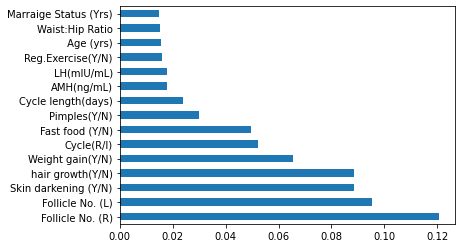

In [ ]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

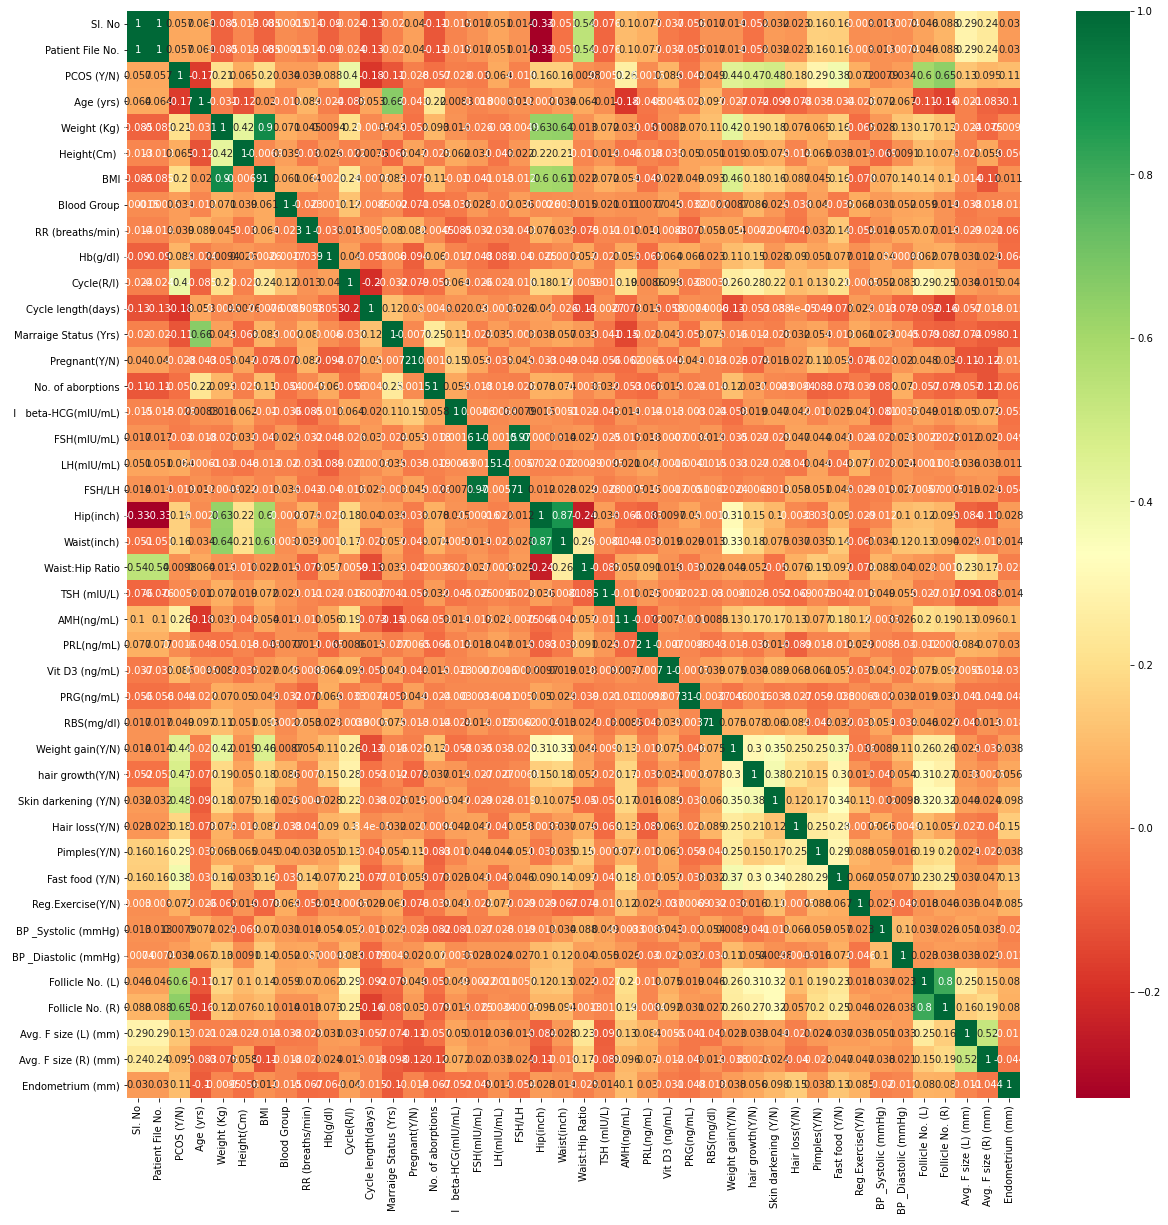

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X=X.drop(["Pregnant(Y/N)","No. of aborptions","Endometrium (mm)","Marraige Status (Yrs)","Hip(inch)","Waist(inch)","PRG(ng/mL)","BP _Systolic (mmHg)","BP _Diastolic (mmHg)"],axis=1)

In [ ]:
featureScores

,Specs,Score
0,Age (yrs),14.707441
1,Weight (Kg),48.475648
2,Height(Cm),0.536939
3,BMI,14.412030
4,Blood Group,0.150346
5,RR (breaths/min),0.118840
6,Hb(g/dl),0.279845
7,Cycle(R/I),27.472346
8,Cycle length(days),8.188794
9,Marraige Status (Yrs),20.805036


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              538 non-null    int64  
 1   Weight (Kg)             538 non-null    float64
 2   Height(Cm)              538 non-null    float64
 3   BMI                     538 non-null    float64
 4   Blood Group             538 non-null    int64  
 5   RR (breaths/min)        538 non-null    int64  
 6   Hb(g/dl)                538 non-null    float64
 7   Cycle(R/I)              538 non-null    int64  
 8   Cycle length(days)      538 non-null    int64  
 9     I   beta-HCG(mIU/mL)  538 non-null    float64
 10  FSH(mIU/mL)             538 non-null    float64
 11  LH(mIU/mL)              538 non-null    float64
 12  FSH/LH                  538 non-null    float64
 13  Waist:Hip Ratio         538 non-null    float64
 14  TSH (mIU/L)             538 non-null    fl

In [ ]:
X=X.drop(["Avg. F size (L) (mm)","Avg. F size (R) (mm)","PRL(ng/mL)","  I   beta-HCG(mIU/mL)"],axis=1)

In [ ]:
X=X.drop(["Waist:Hip Ratio","Blood Group","RR (breaths/min)","BMI"],axis=1)

In [ ]:
X=X.drop(["Vit D3 (ng/mL)"],axis=1)

In [ ]:
X=X.drop(["Hb(g/dl)"],axis=1)

# Model Building 



In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [ ]:
import xgboost as xgb

In [ ]:
model =xgb.XGBClassifier( 
                      learning_rate=0.06,  
                      colsample_bytree = 0.6,
                      subsample = 0.8, 
                      n_estimators=200,                       
                      max_depth=6, 
                      gamma=0)

In [ ]:
from sklearn import metrics

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("XG Boost: Accuracy:",metrics.accuracy_score(y_test, y_pred))

XG Boost: Accuracy: 0.9197530864197531


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

In [ ]:
rfc1=RandomForestClassifier(criterion= "gini",max_depth= 10,max_features="sqrt",n_estimators=150)
rfc1.fit(X_train, y_train)


predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.9382716049382716

In [ ]:
clf = RandomForestClassifier(criterion= "gini",max_depth= 5,max_features="sqrt",n_estimators=50)
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=0.8)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred,average='weighted'))



Accuracy: 0.9444444444444444
Accuracy: 0.94277677315652


Piclke file extraction

In [ ]:
import pickle

In [ ]:
pickle_out=open("classifier.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
from google.colab import files
files.download('classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>